# Oil Futures

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Read in data

In [2]:
df = pd.read_csv(
    Path("../Resources/oil_futures.csv"), parse_dates=True, index_col="Date"
)

df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Lagged_Return
Date,,,,,,,,,
2014-02-20,100.78,100.78,100.78,100.78,0.05,100.78,15.0,12833.0,0.318376
2014-02-21,100.61,100.61,100.61,100.61,0.17,100.61,0.0,12833.0,-0.049588
2014-02-24,100.77,100.77,100.77,100.77,0.16,100.77,6.0,12833.0,-0.168684
2014-02-25,100.57,100.57,100.57,100.57,0.20,100.57,81.0,12827.0,0.159030
2014-02-26,100.69,100.69,100.69,100.69,0.12,100.69,0.0,12776.0,-0.198472


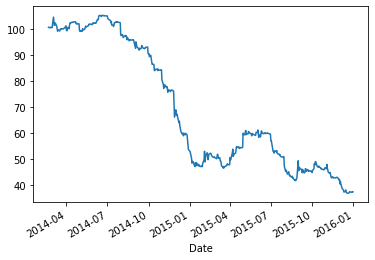

In [3]:
# More on settle prices: https://www.investopedia.com/terms/s/settlementprice.asp
df.Settle.plot()

### Calculate returns

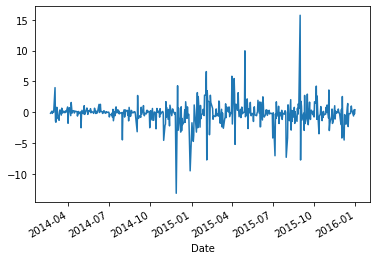

In [4]:
# Create a column of the settle price returns
returns = df.Settle.pct_change() * 100
returns.plot()

In [10]:
# Add columns of returns and lagged returns to the data frame
# The lagged returns are created to associate a date with its returns
df['Return'] = returns.copy()
df['Lag_Return'] = returns.shift()
df = df.dropna()
df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Lagged_Return,Return,Lag_Return
Date,,,,,,,,,,,
2014-02-24,100.77,100.77,100.77,100.77,0.16,100.77,6.0,12833.0,-0.168684,0.159030,-0.168684
2014-02-25,100.57,100.57,100.57,100.57,0.20,100.57,81.0,12827.0,0.159030,-0.198472,0.159030
2014-02-26,100.69,100.69,100.69,100.69,0.12,100.69,0.0,12776.0,-0.198472,0.119320,-0.198472
2014-02-27,100.67,100.67,100.67,100.67,0.02,100.67,0.0,12776.0,0.119320,-0.019863,0.119320
2014-02-28,100.68,100.68,100.68,100.68,0.01,100.68,0.0,12776.0,-0.019863,0.009933,-0.019863


# Prepapre the Features (X) and the Target (y)

In [11]:
# Set the Dependent variable y to the `Return`
y = df.Return

In [12]:
# Select the `Lagged_Return` and assign the DataFrame to X
x = df.Lag_Return.to_frame()
x.head()

,Lag_Return
Date,
2014-02-24,-0.168684
2014-02-25,0.159030
2014-02-26,-0.198472
2014-02-27,0.119320
2014-02-28,-0.019863


In [14]:
# Access the weekofyear attribute from the index
# Create a new column with this called `Week_of_year`
x['week_of_year'] = x.index.weekofyear
x.head()

,Lag_Return,week_of_year
Date,,
2014-02-24,-0.168684,9
2014-02-25,0.159030,9
2014-02-26,-0.198472,9
2014-02-27,0.119320,9
2014-02-28,-0.019863,9


### Get dummy variables for week and year

In [18]:
# Get a dummy variable for each week of the year
X_binary_encoded = pd.get_dummies(x, columns=['week_of_year'])
X_binary_encoded.head()

,Lag_Return,week_of_year_1,week_of_year_2,week_of_year_3,week_of_year_4,week_of_year_5,week_of_year_6,week_of_year_7,week_of_year_8,week_of_year_9,...,week_of_year_44,week_of_year_45,week_of_year_46,week_of_year_47,week_of_year_48,week_of_year_49,week_of_year_50,week_of_year_51,week_of_year_52,week_of_year_53
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-24,-0.168684,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2014-02-25,0.159030,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2014-02-26,-0.198472,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2014-02-27,0.119320,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2014-02-28,-0.019863,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_binary_encoded.shape

### Linear Regresion model

In [ ]:
# Create a Linear Regression model and fit it to the data
# YOUR CODE HERE!

In [ ]:
# Create predictions using the trained model and the `X_binary_encoded` data
# YOUR CODE HERE!

# List the first 10 predictions
# YOUR CODE HERE!

# Evaluating the Model

Evaluate the model using r2, mse, rmse

Compare the rmse to the standard deviation.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate r2_score (r-squared)
# YOUR CODE HERE!

In [ ]:
# Calculate mean squared error 
# Remember, a "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.
# YOUR CODE HERE!

In [ ]:
# Using mean squared error above, calculate root-mean-squared error (RMSE)
# YOUR CODE HERE!

In [ ]:
# Print the r2, mser, rmse, and standard deviation
print(f"R-squared (R2 ): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation of Futures Return: {np.std(y)}")